In [39]:
import pandas as pd
import sklearn
from sklearn.naive_bayes import MultinomialNB

In [40]:
df=pd.read_csv("Amazon Review.csv")
df

,Rating,Text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...
...,...,...
34655,3.0,This is not appreciably faster than any other ...
34656,1.0,Amazon should include this charger with the Ki...
34657,1.0,Love my Kindle Fire but I am really disappoint...
34658,1.0,I was surprised to find it did not come with a...


In [41]:
df["Text"][2]

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  34627 non-null  float64
 1   Text    34659 non-null  object 
dtypes: float64(1), object(1)
memory usage: 541.7+ KB


In [43]:
df=df.dropna(subset=["Rating"])

In [44]:
df=df.dropna(subset=["Text"])
df.head(20)

,Rating,Text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...
5,5.0,This amazon fire 8 inch tablet is the perfect ...
6,4.0,"Great for e-reading on the go, nice and light ..."
7,5.0,"I gave this as a Christmas gift to my inlaws, ..."
8,5.0,Great as a device to read books. I like that i...
9,5.0,I love ordering books and reading them with th...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34626 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  34626 non-null  float64
 1   Text    34626 non-null  object 
dtypes: float64(1), object(1)
memory usage: 811.5+ KB


In [46]:
x=df.iloc[:,1].values
y=df.iloc[:,0].values

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [48]:
x_train.shape

(24238,)

In [50]:
x_test.shape

(10388,)

In [51]:
x.shape

(34626,)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


In [53]:
text_model = Pipeline([('tfidf',TfidfVectorizer(binary = True,max_df=0.611111111111111,norm = 'l2')),('model',MultinomialNB(alpha = 0.058,fit_prior=True))])

In [54]:
import numpy as np
Y=[0] * (len(y))
for i in range(0,(len(y))):
  if y[i]==1 or y[i]==2 or y[i]==3 :
    Y[i] = 0              # Negative sentiments
  else:
    Y[i] = 1              # Positive sentiments

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.4,random_state=0)
print(X_train.shape)
print(X_test.shape)

(20775,)
(13851,)


In [56]:
text_model.fit(X_train,Y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(binary=True, max_df=0.611111111111111)),
                ('model', MultinomialNB(alpha=0.058))])

In [57]:
Y_pred = text_model.predict(X_test)
Y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [59]:
accuracy_score(Y_pred,Y_test)*100

93.81272110316945

In [60]:
confusion_matrix(Y_pred,Y_test)

array([[   65,    26],
       [  831, 12929]], dtype=int64)

In [61]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.07      0.71      0.13        91
           1       1.00      0.94      0.97     13760

    accuracy                           0.94     13851
   macro avg       0.54      0.83      0.55     13851
weighted avg       0.99      0.94      0.96     13851



In [62]:
# import WordCloud

In [63]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [64]:
comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df['Text']:
  val = str(val) 
  tokens = val.split() 

  for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower()     
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = stopwords, 
                      min_font_size = 10).generate(comment_words)

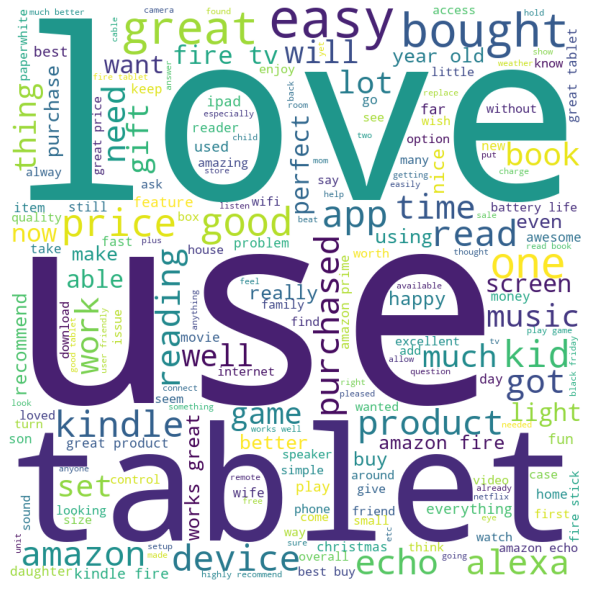

In [65]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 